# ニューラルネットワーク

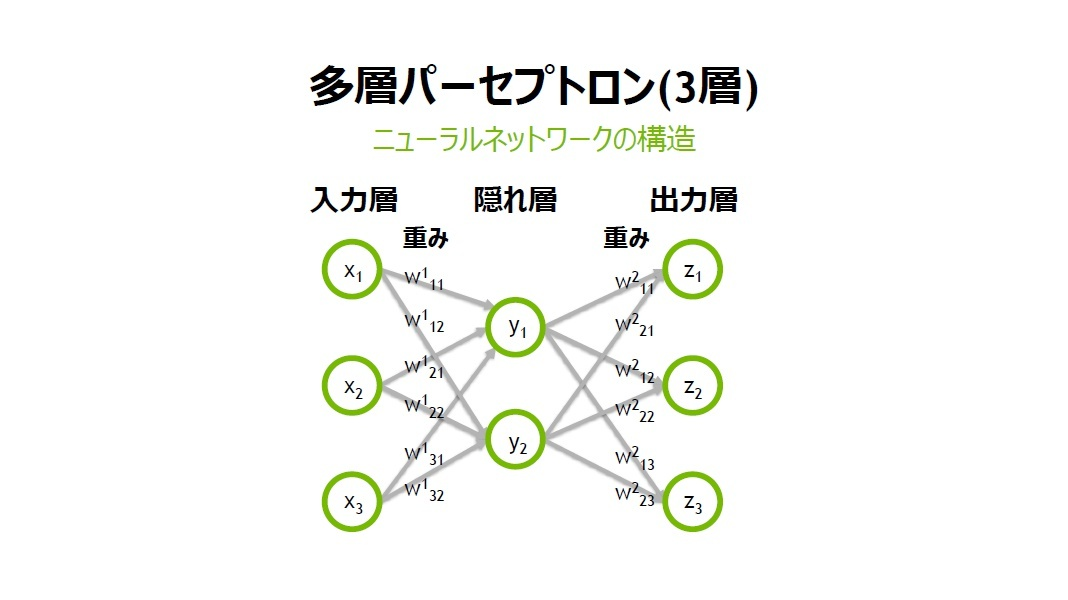

### 左の列を入力層、中間の列を中間層（隠れ層）、一番右の層を出力層と呼ぶ。
# 活性化関数
### 入力信号の総和を出力信号に換算する関数のこと。
### 入力信号の総和がどのように活性化するかということを決定する役割がある。
## シグモイド関数
### ニューラルネットワークでよく用いられる活性化関数のひとつ
### 連続的な実数値の信号

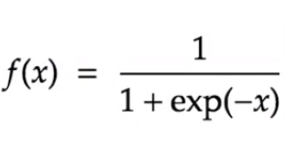

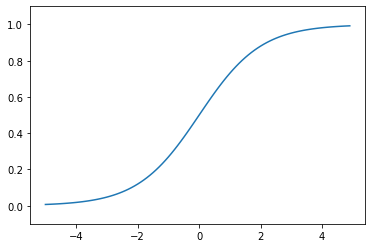

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x)) 

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y軸の範囲を指定
plt.show()

## ステップ関数
### 出力は０か１をとる

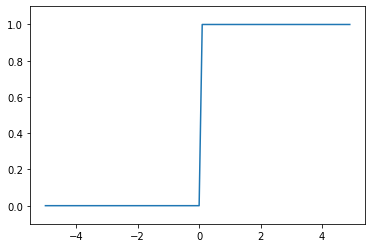

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=int) 

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y軸の範囲を指定
plt.show()

## ReLU関数
### 0を超えていればそのまま出力し0以下なら0を出力する関数

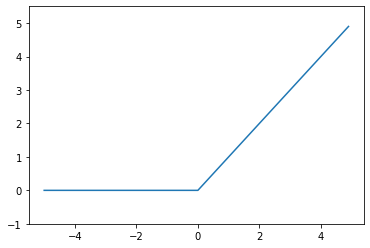

In [4]:
def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1.0,5.5) #y軸の範囲を指定
plt.show()

## 多次元配列
### 簡単にいうと数字の集合
### 一次元の配列

In [8]:
import numpy as np
A=np.array([1,2,3,4])
print(A)
np.ndim(A)
A.shape
A.shape[0]

[1 2 3 4]


4

### 2次元の配列

In [9]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

### ニューラルネットワークの行列の積



In [10]:
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


## 3層ニューラルネットワークの実装


In [11]:
x=np.array([1.0,0.5])
w1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1=np.array([0.1,0.2,0.3])
print(w1.shape)
print(x.shape)
print(b1.shape)


(2, 3)
(2,)
(3,)


### 上記の計算はw1は2×3の配列xは要素数が２の一次元配列

### シグモイド関数を使う

In [15]:
a1=np.dot(x,w1)+b1
z1=sigmoid(a1)
print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [16]:
w2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2=np.array([0.1,0.2])

a2=np.dot(z1,w2)+b2
z2=sigmoid(a2)
print(z2)

[0.62624937 0.7710107 ]


### 最後の活性化関数だけがこれまでの隠れ層とは異なる

In [17]:
def identity_function(x):
    return x

w3=np.array([[0.1,0.3],[0.2,0.4]])
b3=np.array([0.1,0.2])

a3=np.dot(z2,w3)+b3
y=identity_function(a3)
print(y)

[0.31682708 0.69627909]


## 出力層の設計
### ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。出力層の活性化関数は、どちらの問題に用いるかによって変更する必要がある。一般に、回帰問題では恒等関数を、分類問題ではソフトマックス関数を用いる。
## 恒等関数とソフトマックス関数
## 恒等関数
### 入力をそのまま出力する関数、入ってきたものに対して何も手を加えない。

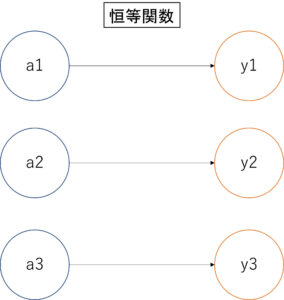

## ソフトマックス関数
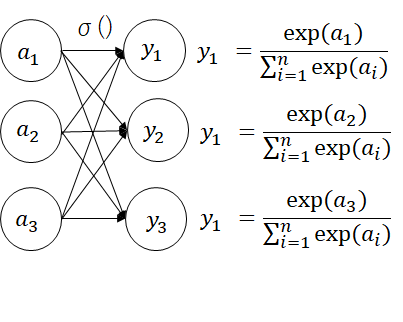

### 分類問題で使われる関数
### ソフトマックスの出力はすべての入力信号から矢印による結びつきがある。
### ソフトマックス関数の実装

In [19]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


## 注意
### コンピューターで数を扱ううえで表現できる数値の範囲に制限があるためオーバーフローという問題を起こしてしまう 
### 改善案　
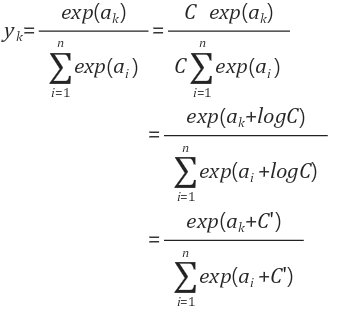

### この式よりソフトマックスの指数関数の計算を行う際には何らかの定数の足し引きを行っても結果は変わらないことがわかる。オーバーフローの対策として入力信号の中で最大の数を用いることが一般的である。

In [20]:
a = np.array([1010, 1000, 999])
np.exp(a) / np.sum(np.exp(a)) 　#ソフトマックス関数の計算
　　　　　　　　　　　　　　　　#正しく計算されない

SyntaxError: invalid non-printable character U+3000 (Temp/ipykernel_24180/1188114836.py, line 2)

In [25]:
c = np.max(a)
a - c


array([-3.7, -1.1,  0. ])

In [23]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([0.01821127, 0.24519181, 0.73659691])

### 子模様に普通に計算していたら不定であったところを入力信号の最大値ひくことで正しく計算できる。
## 出力層のニューロン数
### 出力層のニューロンの数は、解くべき問題に応じて適宜決める必要があり一般にクラス分類では出力層のニューロン数は分類したいクラスの数に設定する。
## MNISTデータセット
### 機械学習の分野で最も有名なデータセットの一つ、手書き数字の画像セット

In [28]:
from mnist import load_mnist

ModuleNotFoundError: No module named 'mnist'

## ニューラルネットワークの推論処理


### MNISTデータセットに対して推論処理を行う場合画像サイズの28×28=784から入力層を784,10クラスの分類から出力層を10としてネットワークをニューロンで構成する。

## バッチ処理
### バッチ処理を行うことで高速に効率よく処理することができる。一次元配列で784の要素を入力したのを、100枚の画像をまとめて100×784で入力することで、100枚分の画像データを一度に行列計算することができ、処理時間を短縮することができる